## Homework 4

In [211]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import KFold


%matplotlib inline

# Multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Data:

- https://github.com/gastonstat/CreditScoring
- Also available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [212]:
df = pd.read_csv('CreditScoring.txt')
df.columns = df.columns.str.lower()

In [213]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Some of the features are encoded as numbers. Use the following code to de-code them:

In [214]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [215]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [216]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [217]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

In [218]:
df.head()
np.sort(df.default.unique())
np.sort(df.time.unique())
np.sort(df.seniority.unique())
np.sort(df.assets.unique())


,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


array([0, 1])

array([ 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 72])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 47, 48])

array([     0,     18,    300,    450,    500,    700,    750,    800,
          875,   1000,   1100,   1150,   1200,   1434,   1500,   1600,
         1750,   1800,   2000,   2100,   2200,   2250,   2500,   2600,
         2650,   2700,   2800,   2900,   3000,   3100,   3144,   3200,
         3216,   3400,   3436,   3500,   3572,   3600,   3700,   3750,
         3850,   4000,   4030,   4100,   4162,   4200,   4300,   4500,
         4600,   4650,   4700,   4750,   4800,   4900,   5000,   5050,
         5100,   5200,   5500,   5800,   6000,   6100,   6200,   6300,
         6500,   6550,   6700,   7000,   7100,   7500,   7600,   7700,
         7750,   8000,   8500,   9000,   9200,   9500,   9800,   9900,
        10000,  10500,  11000,  11500,  11600,  11700,  11800,  11900,
        12000,  12500,  13000,  13500,  13600,  14000,  14500,  14800,
        15000,  15500,  15750,  15900,  16000,  16200,  16500,  17000,
        18000,  18500,  19000,  19400,  20000,  20500,  21000,  21500,
      

## Your code

What are the categorical variables? What are the numerical?

In [219]:
numerical = ['expenses', 'age', 'seniority', 'time', 'income', 'assets', 'debt', 'amount','price']
categorical = ['home', 'marital', 'records',	'job',]


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [220]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

y_train = df_train.default.values
y_val = df_val.default.values

len(df), len(df_train), len(df_val), len(df_test)
len(df_train) + len(df_val) + len(df_test)


(4454, 2672, 891, 891)

4454

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [221]:
df_train[numerical].head()
# roc_auc_score(df_train.default, df_train.expenses)

auc_dict = {}

for n in numerical:
    auc_dict[f"{n}"] = roc_auc_score(df_train.default, df_train[n])    

auc_dict

,expenses,age,seniority,time,income,assets,debt,amount,price
1877,45,28,12,24,102,0,0,700,1229
1803,60,28,4,60,143,0,0,1150,1630
3400,35,27,0,60,295,6000,0,1950,2208
3529,45,28,6,48,114,3500,0,650,1255
1721,60,42,12,36,0,15000,0,1000,1500


{'expenses': 0.4990815782782989,
 'age': 0.4267066727500061,
 'seniority': 0.2906221375508058,
 'time': 0.5608662489595051,
 'income': 0.31799333386736695,
 'assets': 0.35139574328771983,
 'debt': 0.49521703242164505,
 'amount': 0.5910773431595518,
 'price': 0.5043329862114843}

Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

time therefore has the highest AUC.

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [222]:
sel_cols = ['seniority', 'income', 'assets', 'records', 'job', 'home']
del df_train['default']
del df_val['default']
del df_test['default']

datasets = [df_train, df_val, df_test]

for d in datasets:
    d = d[sel_cols].copy()
    d.head()


,seniority,income,assets,records,job,home
1877,12,102,0,no,fixed,private
1803,4,143,0,no,fixed,other
3400,0,295,6000,no,fixed,owner
3529,6,114,3500,no,fixed,owner
1721,12,0,15000,no,freelance,owner


,seniority,income,assets,records,job,home
3346,15,178,30000,yes,freelance,owner
2984,2,184,4000,no,fixed,owner
322,1,90,0,no,fixed,parents
11,7,121,3000,no,fixed,owner
1041,9,178,50000,no,freelance,owner


,seniority,income,assets,records,job,home
808,1,28,0,no,fixed,parents
1412,14,140,3000,no,fixed,private
1179,5,82,0,no,fixed,other
1669,2,318,0,no,fixed,parents
2051,0,140,3000,no,fixed,private


In [223]:
train_dict = df_train.to_dict(orient='records')
train_dict[0]
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
dv.get_feature_names()

{'seniority': 12,
 'home': 'private',
 'time': 24,
 'age': 28,
 'marital': 'married',
 'records': 'no',
 'job': 'fixed',
 'expenses': 45,
 'income': 102,
 'assets': 0,
 'debt': 0,
 'amount': 700,
 'price': 1229}

DictVectorizer(sparse=False)

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [224]:
X_train = dv.transform(train_dict)
X_train.shape
len(X_train)
y_train.shape
len(y_train)

(2672, 29)

2672

(2672,)

2672

In [225]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)
model.intercept_
model.coef_[0].round(3)

LogisticRegression(max_iter=1000, solver='liblinear')

array([-0.06074117])

array([ 0.008,  0.002, -0.   ,  0.   ,  0.016,  0.029,  0.325, -0.572,
       -0.221,  0.155,  0.216,  0.007, -0.009, -0.61 , -0.229, -0.051,
        0.825,  0.004, -0.08 , -0.431,  0.353,  0.057, -0.01 ,  0.049,
       -0.001, -0.913,  0.852, -0.079,  0.004])

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812

In [226]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]
y_pred[::10].round(3)

array([0.579, 0.268, 0.601, 0.141, 0.321, 0.301, 0.076, 0.005, 0.258,
       0.609, 0.843, 0.014, 0.102, 0.046, 0.049, 0.426, 0.167, 0.471,
       0.   , 0.147, 0.428, 0.078, 0.094, 0.066, 0.266, 0.042, 0.11 ,
       0.544, 0.142, 0.101, 0.117, 0.654, 0.416, 0.475, 0.029, 0.327,
       0.573, 0.008, 0.241, 0.746, 0.08 , 0.573, 0.02 , 0.432, 0.054,
       0.79 , 0.049, 0.203, 0.046, 0.74 , 0.43 , 0.897, 0.757, 0.044,
       0.232, 0.28 , 0.179, 0.235, 0.214, 0.235, 0.575, 0.273, 0.152,
       0.556, 0.733, 0.449, 0.064, 0.562, 0.098, 0.216, 0.017, 0.623,
       0.466, 0.281, 0.333, 0.207, 0.038, 0.222, 0.38 , 0.784, 0.263,
       0.352, 0.042, 0.279, 0.026, 0.137, 0.079, 0.198, 0.673, 0.568])

In [227]:
roc_auc_score(y_val, y_pred).round(3)

0.848

AUC is therefore closest to 0.812

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [228]:

def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
    df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    
    return df_scores

In [229]:
df_scores = tpr_fpr_dataframe(y_val, y_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall
0,0.0,246,645,0,0,1.000000,1.000000,0.276094,1.000000
10,0.1,238,384,8,261,0.967480,0.595349,0.382637,0.967480
20,0.2,215,231,31,414,0.873984,0.358140,0.482063,0.873984
30,0.3,183,140,63,505,0.743902,0.217054,0.566563,0.743902
40,0.4,157,95,89,550,0.638211,0.147287,0.623016,0.638211
50,0.5,130,61,116,584,0.528455,0.094574,0.680628,0.528455
60,0.6,93,39,153,606,0.378049,0.060465,0.704545,0.378049
70,0.7,67,19,179,626,0.272358,0.029457,0.779070,0.272358
80,0.8,29,7,217,638,0.117886,0.010853,0.805556,0.117886
90,0.9,8,3,238,642,0.032520,0.004651,0.727273,0.032520


<Figure size 432x288 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fc799edf250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([<matplotlib.axis.YTick at 0x7fc79b0241f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Thresholds')

Text(0.5, 1.0, 'Precision and Recall')

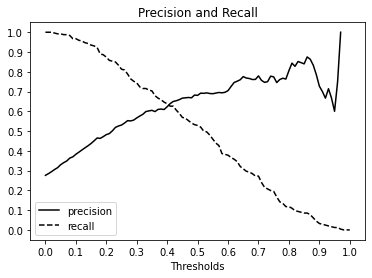

In [230]:

plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.precision, color='black', linestyle='solid', label='precision')
plt.plot(df_scores.threshold, df_scores.recall, color='black', linestyle='dashed', label='recall')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('Precision and Recall')

plt.show()

At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

Precision and Recall intersect around 0.4, therefore.

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [231]:
# Adding to the original function
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
    df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['F1'] = 2 * df_scores.precision * df_scores.recall / (df_scores.precision + df_scores.recall)
    
    return df_scores

In [232]:
df_scores = tpr_fpr_dataframe(y_val, y_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall,F1
0,0.0,246,645,0,0,1.000000,1.000000,0.276094,1.000000,0.432718
10,0.1,238,384,8,261,0.967480,0.595349,0.382637,0.967480,0.548387
20,0.2,215,231,31,414,0.873984,0.358140,0.482063,0.873984,0.621387
30,0.3,183,140,63,505,0.743902,0.217054,0.566563,0.743902,0.643234
40,0.4,157,95,89,550,0.638211,0.147287,0.623016,0.638211,0.630522
50,0.5,130,61,116,584,0.528455,0.094574,0.680628,0.528455,0.594966
60,0.6,93,39,153,606,0.378049,0.060465,0.704545,0.378049,0.492063
70,0.7,67,19,179,626,0.272358,0.029457,0.779070,0.272358,0.403614
80,0.8,29,7,217,638,0.117886,0.010853,0.805556,0.117886,0.205674
90,0.9,8,3,238,642,0.032520,0.004651,0.727273,0.032520,0.062257


<Figure size 432x288 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fc79b963910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([<matplotlib.axis.YTick at 0x7fc79b9569d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Thresholds')

Text(0.5, 1.0, 'F1 scores')

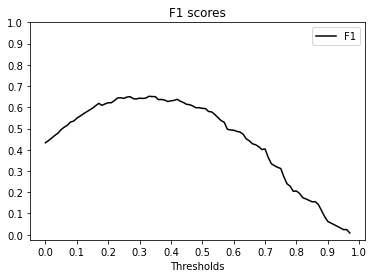

In [233]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.F1, color='black', linestyle='solid', label='F1')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('F1 scores')

plt.show()

In [234]:
# Return specific value
df_scores.loc[df_scores['F1'].idxmax()]

threshold      0.330000
tp           176.000000
fp           118.000000
fn            70.000000
tn           527.000000
tpr            0.715447
fpr            0.182946
precision      0.598639
recall         0.715447
F1             0.651852
Name: 33, dtype: float64

At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

Therefore the maximal value for F1 is reached at threshold ~0.3 (specifically, 0.33).

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


In [235]:
df_train_full.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
1034,5,private,60,24,married,no,fixed,45,127,2000,0,1000,1282,0
3955,14,parents,60,32,married,yes,fixed,35,140,0,0,1150,1273,0
398,25,owner,12,43,married,no,freelance,75,250,100000,0,600,841,0
3994,18,rent,60,37,married,no,fixed,70,100,0,0,1300,1345,0
1355,1,parents,48,24,single,yes,fixed,35,65,0,0,900,1061,1


Create functions for train and predict

In [236]:
def train(df, y):
    cat = df[sel_cols].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[sel_cols].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [237]:
# df_train_full.head()

# df_train_full[sel_cols].head()

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
# df_train_full.columns
# df_train_full['default'].head(10)

df_train_full.shape

(3563, 14)

In [238]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train_full = df_train_full.copy()
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx].copy()

    y_train = df_train.default.values    

    y_val = df_val.default.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)



In [239]:
np.array(aucs).round(3)
print(f"Mean: {np.mean(aucs)}; Std Dev: {np.std(aucs).round(3)}")

array([0.826, 0.825, 0.789, 0.825, 0.805])

Mean: 0.8141695497076604; Std Dev: 0.015


How large is standard devidation of the scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

Std Dev = ~0.014

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [240]:
def train(df, y, C=1.0):
    cat = df[sel_cols].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)

    return dv, model

In [241]:
c_vals = [0.01, 0.1, 1, 10]

In [242]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in c_vals:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train_full = df_train_full.copy()
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx].copy()

        y_train = df_train.default.values    

        y_val = df_val.default.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))   

C=0.01, auc = 0.808 ± 0.012
C=0.1, auc = 0.813 ± 0.014
C=1, auc = 0.814 ± 0.015
C=10, auc = 0.814 ± 0.015


Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

Best C value (based on 3 d.p.) is C=1

## Submit the results

Submit your results here: https://forms.gle/e497sR5iB36mM9Cs5

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 04 October 2021, 17:00 CET. After that, the form will be closed.